## A Classification Problem Statement using Stratified Cross-Validation

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [205]:
test=pd.read_csv('https://s3.amazonaws.com/acadgildsite/wordpress_images/datasets/titanic/test.csv')
train=pd.read_csv('https://s3.amazonaws.com/acadgildsite/wordpress_images/datasets/titanic/train.csv')


In [206]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


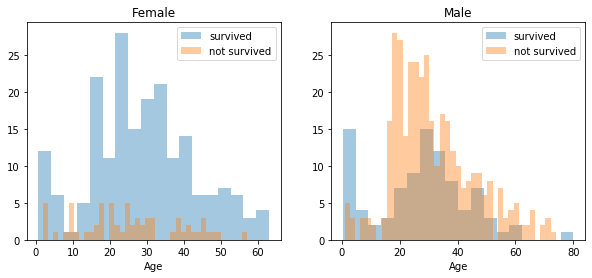

In [208]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

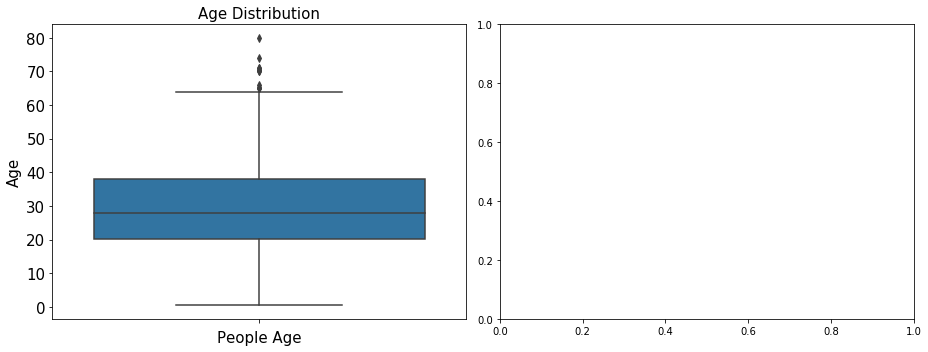

In [209]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Age', data = train, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

# sns.distplot(train['Age'], ax = ax2)
# sns.despine(ax = ax2)
# ax2.set_xlabel('Age', fontsize=15)
# ax2.set_ylabel('Occurence', fontsize=15)
# ax2.set_title('Age x Ocucurence', fontsize=15)
# ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

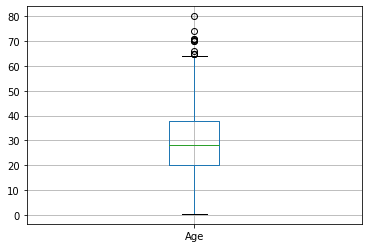

In [210]:
train.boxplot(column=['Age'])

### Embarked, Pclass and Sex:

C:\Users\kjk\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


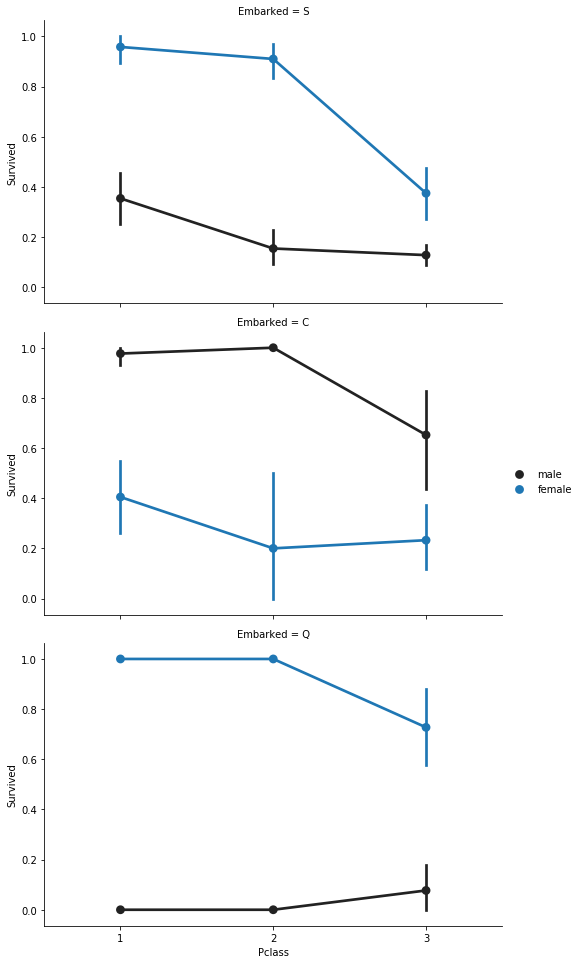

In [211]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

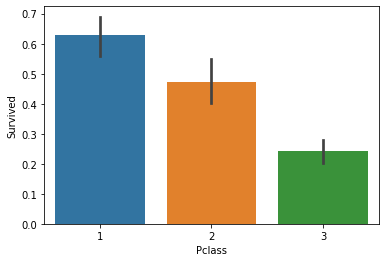

In [212]:
sns.barplot(x='Pclass', y='Survived', data=train)

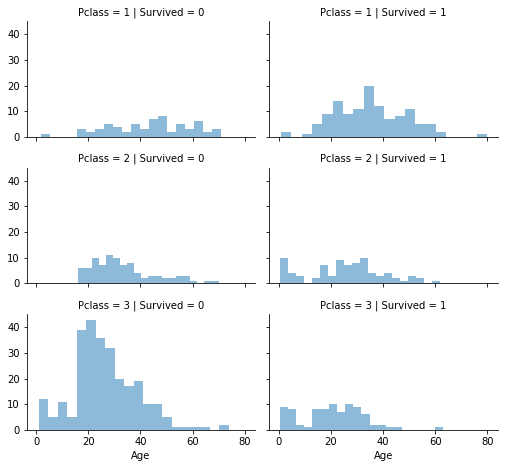

In [213]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### SibSp and Parch:

In [214]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\kjk\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


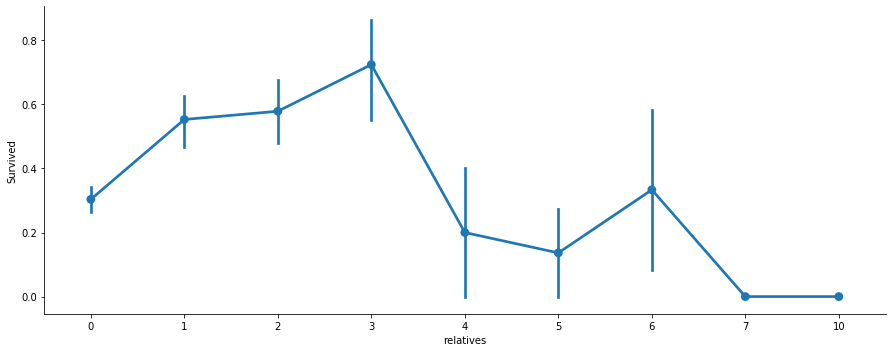

In [215]:
axes = sns.factorplot('relatives','Survived', 
                      data=train, aspect = 2.5, )


## Data preprocessing

In [256]:
train=train.drop(['PassengerId'],axis=1)
test=test.drop(['PassengerId'],axis=1)

In [217]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


### Deal with missing and duplicate values

In [218]:
def Check_duplicate(df):
    duplicate_row=df.duplicated().sum()
    null_values=df.isnull().sum()
    Total_null_values=sum(null_values)
    if(duplicate_row>0):
        print("Please remove duplicates Row=",duplicate_row)
    elif(Total_null_values>0):
            print("Please deal with Missing Values",null_values)
    else:
        print(duplicate_row,"duplicated and null/Missing vlues",Total_null_values," in this dataFrame")

In [219]:
Check_duplicate(train)

Please deal with Missing Values Survived       0
Pclass         0
Name           0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2
relatives      0
not_alone      0
dtype: int64


In [220]:
Check_duplicate(test)

Please deal with Missing Values PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
relatives        0
not_alone        0
dtype: int64


In [221]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train.drop(['Cabin'], axis=1)
test_df = test.drop(['Cabin'], axis=1)

In [222]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,1,8


In [223]:
# Quartiles
Q1=train['Age'].quantile(q = 0.25)
Q2=train['Age'].quantile(q = 0.50)
Q3=train['Age'].quantile(q = 0.75)
Q4=train['Age'].quantile(q = 1.00)
print('1º Quartile: ',Q1)
print('2º Quartile: ',Q2)
print('3º Quartile: ',Q3)
print('4º Quartile: ',Q4)
#Calculate the outliers:
IQR = Q3 - Q1 #Interquartile range,
# lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
# Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
  
print("Lower bound",Q1 - 1.5 * IQR)
print("Upper bound",Q3 + 1.5 * IQR)  
    

1º Quartile:  20.125
2º Quartile:  28.0
3º Quartile:  38.0
4º Quartile:  80.0
Lower bound -6.6875
Upper bound 64.8125


In [224]:
print('Numerber of outliers: ', train[train['Age'] > 64.8]['Age'].count())
print('Number of clients: ', len(train))
#Outliers in %
print('Outliers are:', round(train[train['Age'] > 64.8]['Age'].count()*100/len(train),2), '%')

Numerber of outliers:  11
Number of clients:  891
Outliers are: 1.23 %


In [225]:
## Flooring
train.loc[train["Age"] < (Q1 - 1.5 * IQR),"Age"] = train["Age"].quantile(0.05)

## Capping 

train.loc[train["Age"] > (Q3 + 1.5 * IQR),"Age"] = train["Age"].quantile(0.95)


In [226]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(train['Age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(train['Age'].std(), 1))

print('Median',round(train['Age'].median(),1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(train['Age'].std()*100/train['Age'].mean(), 1), ', High middle dispersion')

MEAN: 29.5
STD : 14.0
Median 28.0
CV  : 47.5 , High middle dispersion


In [227]:
train.iloc[train[train['Age'] > 64.8]['Age']]  # now no outliers

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck


In [243]:
train['Age']=train['Age'].fillna(train['Age'].median())

In [244]:
test['Age']=test['Age'].fillna(test['Age'].median())

In [245]:
Check_duplicate(train)  # now age have no duplicte and no outlier

Please deal with Missing Values Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     2
relatives    0
not_alone    0
Deck         0
dtype: int64


In [246]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode())

In [247]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     889 non-null float64
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(3), int32(2), int64(5), object(2)
memory usage: 76.6+ KB


#### Fare:
Converting “Fare” from float to int64, using the “astype()” function pandas provides:


In [248]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

### Name:
We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [253]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train= train.drop(['Name'], axis=1)
test= test.drop(['Name'], axis=1)

### Sex:
Convert ‘Sex’ feature into numeric.


In [249]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)


### Ticket:

In [250]:
train['Ticket'].describe()

KeyError: 'Ticket'

##### Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.


In [240]:
train= train_df.drop(['Ticket'], axis=1)
test= test_df.drop(['Ticket'], axis=1)

### Embarked:
Convert ‘Embarked’ feature into numeric.


In [241]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Creating Categories:
We will now create categories within the following features:

In [251]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

In [254]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0.0,1,0,8,1
1,1,1,1,5,1,0,71,1.0,1,0,3,3
2,1,3,1,3,0,0,7,0.0,0,1,8,2
3,1,1,1,5,1,0,53,0.0,1,0,3,3
4,0,3,0,5,0,0,8,0.0,0,1,8,1


In [257]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,3,0,5,0,0,7,2,0,1,8,1
1,3,1,6,1,0,7,0,1,0,8,3
2,2,0,6,0,0,9,2,0,1,8,1
3,3,0,3,0,0,8,0,0,1,8,1
4,3,1,2,1,1,12,0,2,0,8,3
